In [273]:
import h5py
import numpy as np
from chunkflow.chunk import Chunk
from skimage.transform import resize
from skimage import color
from skimage import segmentation
import matplotlib.pyplot as plt
import time
import IPython

%load_ext autoreload
%autoreload 2
%matplotlib inline

def scale_data(vol, seg, size=180):
    length = vol.shape[0]
    vol = resize(vol, (length, size, size))
    seg = resize(seg, (length, size, size), order=0, preserve_range=True, anti_aliasing=False)

    return (vol, seg)
    
def label_data(vol, seg):
    length = vol.shape[0]
    size = vol.shape[1]
    # reshape for labeling
    seg = np.reshape(seg, (size, length*size) )
    vol = np.reshape(vol, (size, length*size) )
    # label
    labeled = color.label2rgb(seg, vol, alpha=0.15, bg_label=-1)
    # shape back
    labeled = np.reshape(labeled, (length, size, size, 3) )

    return labeled

def vis_volume(volume):
    length = volume.shape[0]
    
    # set up
    fig = plt.figure()
    axes = fig.add_subplot()
    hfig = display(fig, display_id=True)

    # display
    for i in range(length):
        axes.imshow(volume[i], interpolation='none', filternorm=False, resample=False)
        fig.canvas.draw()
        hfig.update(fig)
        if i != length-1:
            plt.cla()
    # clean up
    IPython.display.clear_output()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [343]:
from dataset.segmentation import CremiDataset
from dataset.ground_truth_volume import *

patch_size = 64
dataset = CremiDataset(patch_size=patch_size)

read from HDF5 file: ./data/cremi/sample_A.hdf
global offset: None
read from HDF5 file: ./data/cremi/sample_A.hdf
global offset: None


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

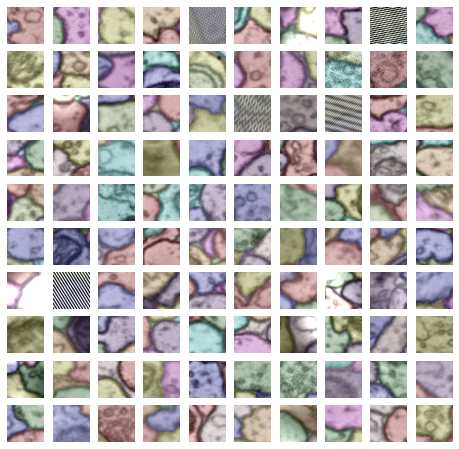

In [277]:
num_plot = 5
i = 28
fig, axarr = plt.subplots(num_plot,num_plot)
fig.set_size_inches(8, 8)

for i in range(num_plot):
    for j in range(num_plot):
        patch = dataset.random_training_patch
        labeled_data = label_data(patch.image[0],patch.label[0])
        axarr[i,j].imshow(labeled_data[i])

[axi.set_axis_off() for axi in axarr.ravel()]
plt.show()

compute_affinity takes 0.0166 seconds.
compute_lsd takes 128.094 seconds.
init_tio_objects takes 0.0142 seconds.
transform takes 0.0362 seconds.
torch.Size([1, 64, 64, 64])
/usr/local/lib/python3.9/site-packages/skimage/color/colorlabel.py:113: UserWarning: Negative intensities in `image` are not supported
  return _label2rgb_overlay(label, image, colors, alpha, bg_label,


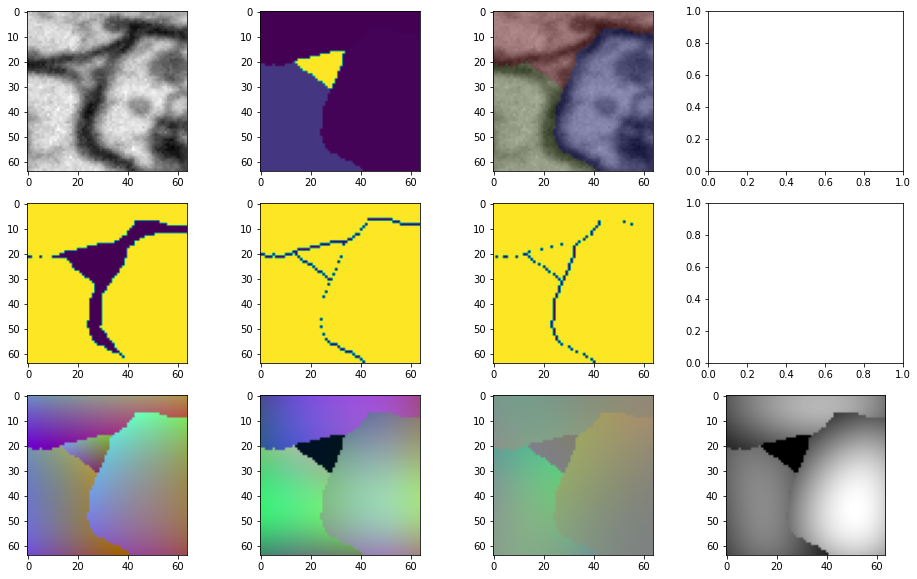

In [345]:
patch = dataset.random_training_patch

i = 5

fig, axarr = plt.subplots(3,4)
fig.set_size_inches(16, 10)
axarr[0,0].imshow(patch.image[0][i], cmap='gray')
axarr[0,1].imshow(patch.label[0][i])
axarr[0,2].imshow(label_data(patch.image[0],patch.label[0])[i])
axarr[1,0].imshow(patch.affinity[0][i])
axarr[1,1].imshow(patch.affinity[1][i])
axarr[1,2].imshow(patch.affinity[2][i])
axarr[2,0].imshow(patch.get_lsd_channel(0)[i])
axarr[2,1].imshow(patch.get_lsd_channel(1)[i])
axarr[2,2].imshow(patch.get_lsd_channel(2)[i])
axarr[2,3].imshow(patch.get_lsd_channel(3)[i], cmap='gray')


In [320]:
from segmentation.local_shape_descriptor import get_local_shape_descriptors

sigma = 8.0
sigma_tuple = (8.0,)*3
lsd = get_local_shape_descriptors(np.squeeze(patch.label), sigma_tuple)
print(lsd.shape)

(10, 64, 64, 64)


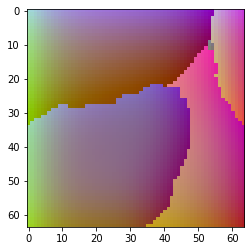

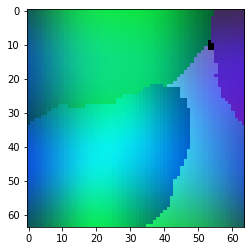

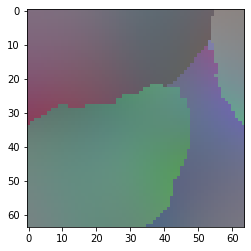

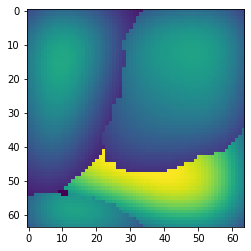

In [331]:
i = 1
lsd1 =  np.swapaxes(lsd[0:3, i ,: ,:],0,2)
plt.imshow(lsd1)
plt.show()
lsd2 =  np.swapaxes(lsd[3:6, i ,: ,:],0,2)
plt.imshow(lsd2)
plt.show()
lsd3 =  np.swapaxes(lsd[6:9, i ,: ,:],0,2)
plt.imshow(lsd3)
plt.show()
lsd4 =  lsd[9, i ,: ,:]
plt.imshow(lsd4)
plt.show()

In [293]:
s = 4.0
print((s,)*4)

(4.0, 4.0, 4.0, 4.0)


In [56]:
import time

start = time.time()
for i in range(100):
    patch = dataset.random_training_patch
end = time.time()
print(end - start)


5.717328786849976
